## 3. NumPy and Pandas for 2-D Data

### Analyzing Subway and Weather Data

Potential Questions...

- What variables are related to subway ridership?
  - Which stations have the most riders?
  - What are the relationship patterns over time?
  - How does the weather affect ridership?
- What patterns can I find in the weather?
  - Is the temperature rising throughout the month?
  - How does weather vary across the city?

Two dimensional Data

Python : Lists of lists
NumPy  : 2D array
Pandas : DataFrame

2D arrays, as opposed to array of arrays
- More memory efficient (e.g. a[1,3] as opposed to a[1][3])
- mean(), std() etc. operate on entire array

In [1]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])


In [2]:
def mean_riders_for_max_station(ridership):
    max_station = ridership[0, :].argmax()
    mean_for_max = ridership[:, max_station].mean()
    overall_mean = ridership.mean()
    return (overall_mean, mean_for_max)

In [3]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

### NumPy Axis

In [4]:
def min_and_max_riders_per_day(ridership):
    mean_ridership_per_day = ridership.mean(axis=0)
    max_daily_ridership = mean_ridership_per_day.max()     
    min_daily_ridership = mean_ridership_per_day.min()    
    return (max_daily_ridership, min_daily_ridership)

In [5]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

### Pandas DataFrame : Accessing Elements

In [6]:
import pandas as pd

ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [7]:
def mean_riders_for_max_station(ridership):
    max_station = ridership.iloc[0].argmax()
    mean_for_max = ridership[max_station].mean()
    overall_mean = ridership.values.mean()
    return (overall_mean, mean_for_max)

In [8]:
mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

### Loading data into a DataFrame

DataFrame is a great data structure to represent CSVs

In [9]:
subway_df = pd.read_csv('./nyc_subway_weather.csv')

In [10]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [11]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


### Calculating Correlation

Calculating Correlation (Pearson's r)

Pearson's r:
- First standardize each variable (express the difference with mean in std * k) (k 는 상수)
- Multiply each pair of values and take the average

r = average of (x in std units) * (y in std units)

Pearson'r > 0 : two variables have positive correlation
Pearson'r > 0 : two variables have negative correlation

-1 < Pearson's r < 1

- if the absolute value is closer to 0, it means the correlation is weaker
- if the absolute value is closer to 1, it means the correlation is stronger
- only measures "linear correlation"

Corrected vs. Uncorrected Standard Deviation

By default, Pandas' std() function computes the standard deviation using Bessel's correction. Calling std(ddof=0) ensures that Bessel's correction will not be used

Pearson's r in NumPy

NumPy's corrcoef() function can be used to calculate Pearson's r, also known as the correlation coefficient.

In [12]:
import pandas as pd

subway_df = pd.read_csv('./nyc_subway_weather.csv')

def correlation(x, y):
    standardized_x = (x - x.mean())/ x.std(ddof=0) 
    standardized_y = (y - y.mean())/ y.std(ddof=0)
    return (standardized_x * standardized_y).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))
print(correlation(entries, cum_entries))

0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


### Pandas Axis Names

### DataFrame Vectorized Operations

- Similar to vectorized operatiosn for 2D NumPy arrays.
- Match up elements by index and column name rather than position

In [13]:
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

In [14]:
def get_hourly_entries_and_exits(entries_and_exits):
    return entries_and_exits.apply(lambda x: (x - x.shift(1)).fillna(x[0]))

In [15]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,3144312.0,1088151.0
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


### Non-Built-In Functions for DataFrames

#### DataFrame.applymap()

In [16]:
# 예시

df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
def add_one(x):
        return x + 1
        
df.applymap(add_one)

,a,b,c
0,2,11,6
1,3,21,11
2,4,31,16


In [17]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [18]:
def convert_grade(grade):
    if grade >= 90 and grade <= 100:
        return 'A'
    elif grade >= 80 and grade <= 89:
        return 'B'
    elif grade >= 70 and grade <= 79:
        return 'C'
    elif grade >= 60 and grade <= 69:
        return 'D'
    else:
        return 'F'

In [19]:
def convert_grades(grades):
    return grades.applymap(convert_grade)

In [20]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


#### DataFrame.apply()

- applymap()은 df의 grid 각각에 대해서 특정 함수f를 적용할 때 사용
- 반면, apply()는 Series일 때와 유사하게 df를 각 col으로 분리하여 f를 적용한다

In [21]:
# 예시 (위에 grades_df data 사용하여)

def convert_grades_curve(exam_grades):
    return pd.qcut(exam_grades, [0, 0.1, 0.2, 0.5, 0.8, 1],
                   labels=['F', 'D', 'C', 'B', 'A'])
# 이 함수는 각 col(각 exam) 내에서 비율을 따져서 값을 return 하는 함수이므로 각 grid가 아닌 
# 각 col별로 f를 적용해야 한다. 이럴 때에는 applymap()이 아니라 apply() 사용해야

print(convert_grades_curve(grades_df['exam1']))
print(grades_df.apply(convert_grades_curve))

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [22]:
def standardize_col(col):
    return (col - col.mean()) / col.std(ddof=0)

In [23]:
def standardize(df):
    return df.apply(standardize_col)

In [24]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


##### DataFrame에 apply() 사용하면 Series가 반환될 수 도 있다 (만일 apply하는 function이 각각의 col을 무슨 작업을 거쳐서 하나의 value를 반환하는 함수라면...)

In [25]:
# 예시
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

print(df.apply(np.mean))
print(df.apply(np.max))

a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64


In [26]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

In [27]:
def second_largest_in_col(col):
    return sorted(col)[-2]

In [28]:
def second_largest(df):
    return df.apply(second_largest_in_col)

In [29]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

### Adding a DataFrame to a Series

In [30]:
# Adding a Series to a square DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [31]:
# Adding a Series to a one-row DataFrame 
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [32]:
# Adding a Series to a one-column DataFrame
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [33]:
# Adding when DataFrame column names match Series index
if True:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [34]:
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print(df)
    print('') # Create a blank line between outputs
    print(df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### Standardizing Each Column Again (without using apply)

In [35]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

Q.) Create function to standardize each column of the given DataFrame. To standardize a variable, convert each value to the number of standard deviations it is above or below the mean. This time, try to use vectorized operations instead of apply(). You should get the same results as you did before.

In [36]:
def standardize_without_apply(df):
    df_copy = df.copy()
    for col_name in df:
        df_copy[col_name] = (df[col_name] - df[col_name].mean()) / df[col_name].std(ddof=0)
    return df_copy

In [37]:
standardize_without_apply(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


Q.) Create function to standardize each row of the given DataFrame. Again, try not to use apply().
This one is more challenging than standardizing each column!

In [38]:
def standardize_rows(df):
    mean_diff = df.sub(df.mean(axis=1), axis=0) 
    return mean_diff.div(df.std(axis=1), axis=0)

In [39]:
standardize_rows(grades_df)

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


### Pandas Groupby

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

filename = './nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

In [41]:
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

In [42]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [43]:
subway_df.groupby('UNIT')['precipi'].mean()
# 각 station별 강수량의 평균 계산

UNIT
R003    0.001250
R004    0.002629
R005    0.002674
R006    0.002611
R007    0.002471
R008    0.002781
R009    0.002686
R011    0.006250
R012    0.006183
R013    0.006183
R016    0.006250
R017    0.006183
R018    0.001568
R019    0.002527
R020    0.006183
R021    0.006250
R022    0.006183
R023    0.006183
R024    0.002541
R025    0.002527
R027    0.006183
R029    0.006183
R030    0.006183
R031    0.006183
R032    0.006216
R033    0.006183
R034    0.005941
R035    0.006250
R036    0.001638
R037    0.001585
          ...   
R321    0.006183
R322    0.006425
R323    0.006337
R325    0.001200
R330    0.006497
R335    0.002744
R336    0.002805
R337    0.002738
R338    0.002701
R341    0.002514
R344    0.005488
R345    0.006114
R346    0.006264
R348    0.001494
R354    0.002814
R356    0.002670
R358    0.002754
R370    0.006534
R371    0.005116
R372    0.006450
R373    0.006250
R382    0.002655
R424    0.004848
R429    0.001585
R453    0.006481
R454    0.006467
R455    0.006726
R456    0

In [44]:
import pandas as pd

ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [45]:
ridership_df

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [48]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [50]:
ridership_df.groupby('UNIT')[['ENTRIESn', 'EXITSn']].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


### Working with Multiple DataFrames

Q.) Use merge() function to combine the subway and weather data. You should return a single dataframe with one row for each date, hour, and location. Only include times and locations that have both subway data and weather data available.

In [51]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [57]:
subway_df.merge(weather_df, on = ['DATEn', 'hour', 'latitude', 'longitude'], \
                how='inner').head()

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0


In [58]:
def combine_dfs(subway_df, weather_df):
    return subway_df.merge(weather_df, on = ['DATEn', 'hour', 'latitude', 'longitude'],
                           how='inner')

In [59]:
combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


### Plotting with DataFrames

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [69]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv('./' + filename)

In [70]:
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

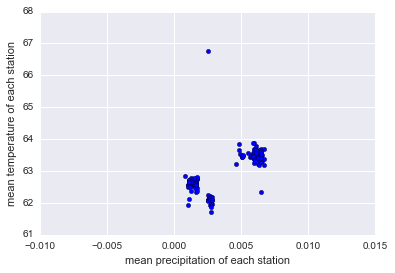

In [73]:
# scatterplot : mean precipitation of stations and mean temperature of stations

X = subway_df.groupby('UNIT').mean()['precipi']
Y = subway_df.groupby('UNIT').mean()['tempi']

plt.scatter(x=X, y=Y)
plt.xlabel('mean precipitation of each station')
plt.ylabel('mean temperature of each station')

In [77]:
# scatterplot of subway stations with latitude and longtitude as x and y axes
# and ridership as the bubble size

data_by_location = subway_df.groupby(['latitude', 'longitude'],
                                    as_index = False).mean()

In [78]:
data_by_location.head()['latitude']

0    40.576152
1    40.576298
2    40.577961
3    40.589547
4    40.590867
Name: latitude, dtype: float64

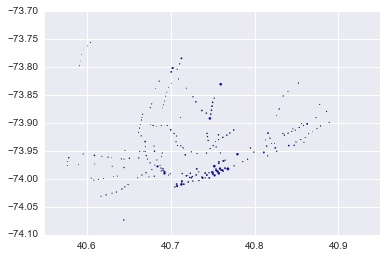

In [83]:
# adding parameter 's' for bubble size
scaled_entries = (data_by_location['ENTRIESn_hourly'] / data_by_location['ENTRIESn_hourly'].std())

plt.scatter(data_by_location['latitude'], data_by_location['longitude'],
           s = scaled_entries)